## Problem 1   
Consider a table with 3 columns and 1000 rows, some of whose entries are
missing. Denote by $A$ the set of rows with an entry in the first
column, $B$ the set of rows with an entry in the second column, and $C$
the set of rows with an entry in the third column. Use set notation
(intersections, unions, and complements) to represent the following sets
in terms of $A$, $B$, and $C$.

(i) The set of rows with no missing entries

(ii) The set of rows with all missing entries

(iii) The set of rows with at least one entry present

(iv) The set of rows with an entry in the first column and exactly one
    other entry
    
    

## Problem 2 

Each of 68 people is interviewed and scored on a scale from 0 to 10
  in three different categories. A composite score is obtained for
  each person by averaging the person's category scores. These data
  are arranged into a $68 \times 4$ matrix $X$, so that each row consists
  of a particular interviewee's category scores and composite score.   
Find the determinant of $X' X$. 

## Problem 3

(a) Does there exist a linearly dependent list of 10 vectors with the property that every sublist of length 9 is linearly independent?

(b) Does there exist a linearly dependent list of 10 vectors with the property that there are exactly 21 ways to remove two vectors from the list to obtain a linearly independent list?

## Problem 4

A **pangram** is a sentence which contains every letter (they are useful for demonstrating fonts). *The quick brown fox jumps over the lazy dog* is a famous example of a pangram. 

Write a Julia function to check whether a given string is a pangram. 

Hint: you can get the alphabet as a `Set` by doing `Set('a':'z')`. Also, note the characters (single quotes) and strings (double quotes) are different in Julia. 

## Problem 5

In the game of Set, every card has four features:

**Number**. 1, 2, or 3  
**Color**. purple, red, or green  
**Shape**. oval, squiggle, or diamond  
**Shading**. striped, solid, or outline

![set](set.png)

There is exactly one card for every possible combination of attributes (for example there's exactly one card with 2 red solid squiggles), so there are 81 cards in total. 

Three cards are said to form a set if for each feature, the three cards are either all the same or all different. For example, the cards shown above form a set because their shapes are all different, their shading is all different, the numbers are all different, and the colors are all different. 

The cards are shuffled, and 12 cards are dealt face up for all players to see. If any three of the cards forms a set, then the first player to identify a set gets to pick up those cards, and the cards are replaced from the deck. If no sets are present, then three additional cards are dealt. If a set is identified at 15 cards, then the three removed cards are not replaced, and the count goes back down to 12. If no sets are present even at 15 cards, then three more cards are dealt to get up to 18, and so on. The game ends when the deck is empty and there are no more sets. 

Write a program to simulate this game, play it 10,000 times, and find the proportion of games in which 18 cards appear at some point.

**Hints:**

(1) You can represent cards either as 4-tuples of `Int`s (like (1, 2, 1, 1)) or as a new type.  
(2) It's going to be important to break your program up into small, dedicated functions. For example, you can write a function for returning the 81 total cards, a function for shuffling the deck, a function which takes three cards and returns true or false depending on whether they form a set, a function for dealing cards, a function for finding all the sets on the board, a function which takes a single turn by randomly selecting one of the available sets or adding three cards to the board if there are no sets, and finally a function which puts those functions together to play the game.  
(3) Some Julia tips: 
  - `randperm` generates random permutations, and you can index an array with the resulting list to shuffle it. 
  - `vcat` concatenates two arrays.
  - You probably want to use a four-dimensional array comprehension to generate the list of all cards, and you can index it with a colon to flatten it.
  - To remove elements at positions `i`, `j`, and `k` from an array `A`, you can do `A[setdiff(1:end, (i,j,k))]`
  - You can start with an empty array and grow it one element at a time inside a loop using this pattern:
    ```julia 
    A = []
    for x in 1:10
        push!(A, x)
    end
    ```
  - You can use nested `for` loops to check all the triples to look for a set. There are more efficient algorithms, but that's OK.

In [78]:
using Random


## Problem 6   
Show that if $\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$ is linearly
independent and
$\{\mathbf{v}_1 + \mathbf{w}, \mathbf{v}_2 \ldots, \mathbf{v}_n\}$ is
linearly dependent, then $\mathbf{w}$ is in the span of
$\{\mathbf{v}_1, \ldots, \mathbf{v}_n\}$.

## Problem 7

Show that if $A$ is a symmetric matrix, then 
$$
A = \lambda_1 \mathbf{u}_1 \mathbf{u}_1' + \cdots + \lambda_1 \mathbf{u}_n \mathbf{u}_n'
$$
where $\mathbf{u}_1, \ldots, \mathbf{u}_n$ is a list of linearly independent unit eigenvectors of $A$ and $\lambda_1, \ldots, \lambda_n$ are the corresponding eigenvalues. Does this formula hold if $A$ is diagonalizable but not symmetric?

Hints: start with the orthogonal diagonalization of $A$ and use block multiplication.

## Problem 8   
Use the result of the previous exercise to show that a quadratic function $f:\mathbb{R}^n \to \mathbb{R}$ has a local minimum at a critical point where the eigenvalues of the Hessian of $f$ are all positive.


## Problem 9
Suppose that $A = U \Sigma V'$ where $\Sigma$ is diagonal and $U$ and
$V$ are orthogonal matrices. Show that the columns of $U$ are
eigenvectors of $AA'$ and that the columns of $V$ are eigenvectors of
$A'A$.

Hint: substitute $A = U \Sigma V'$ into the expressions $AA'$ and $A'A$.

## Problem 10 
The singular value decomposition can be used to identify the primary
axes in a ellipsoidal point cloud. Run the following block to generate
and plot a set of 100 points.

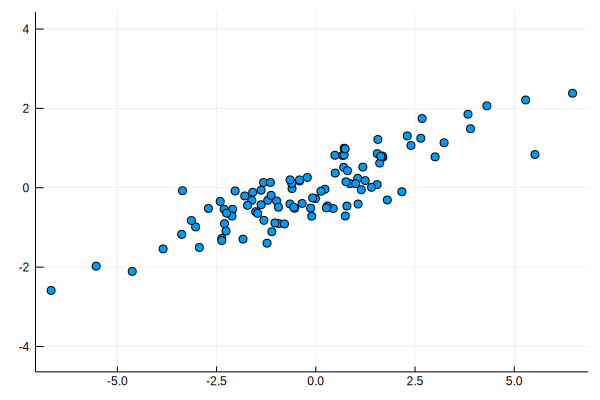

In [79]:
using LinearAlgebra 
using Plots 
using Random; Random.seed!(1234) # to make sure we get the same points
numpoints = 100 
T = [1 2; 0 1]
P = T * randn(2, numpoints)
scatter(P[1,:], P[2,:], aspect_ratio=:equal, legend=false)


Use Julia to compute the singular value decomposition $U \Sigma V'$ of
$P$, and show visually that the columns of $U$ run along the axes of the
ellipse that fits the point cloud (the one shown in the figure).

Hint: `plot!([(a,b),(c,d)])` adds a line segment from the point $(a,b)$ to the point $(c,d)$ to
the current plot. You’ll want to plot line segments representing both of
the columns of $V$.

In [81]:
U, Σ, V = svd(P)

SVD{Float64,Float64,Array{Float64,2}}([-0.938459 -0.345391; -0.345391 0.938459], [23.6694, 4.33963], [0.0502752 0.10438 … -0.0435751 0.0292723; -0.120498 -0.0121767 … 0.153343 -0.0621099])